In this course, we'll focus on how to use data visualization to communicate insights and tell stories. In this mission, we'll start with a standard matplotlib plot and improve its appearance to better communicate the patterns we want a viewer to understand. Along the way, we'll introduce the principles that informed those changes and provide a framework for you to apply them in the future. 

### Introduction to the data.

The Department of Education Statistics releases a data set annually containing the percentage of bachelor's degrees granted to women from 1970 to 2012. The data set is broken up into 17 categories of degrees, with each column as a separate category.

Randal Olson, a data scientist at University of Pennsylvania, has cleaned the data set and made it available on his personal website. Here's a preview of the first few rows:

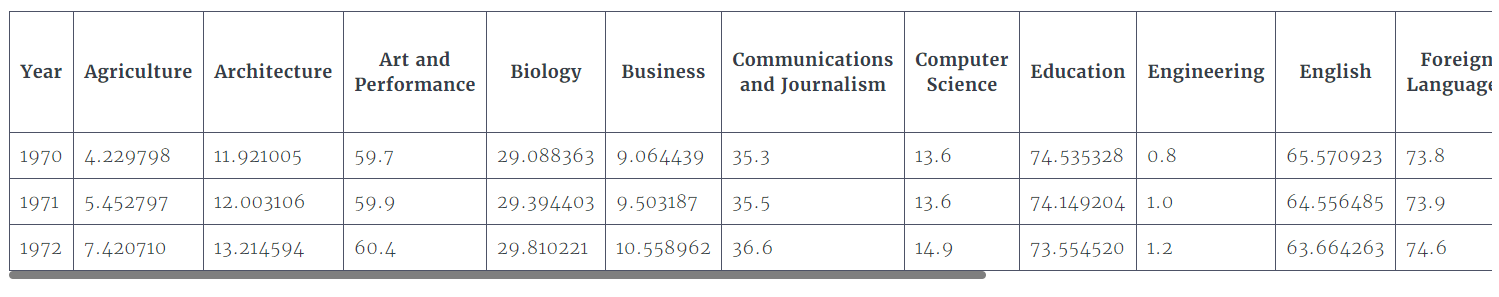

Randal compiled this data set to explore the gender gap in STEM fields, which stands for science, technology, engineering, and mathematics. This gap is reported on often in the news and not everyone agrees that there is a gap.

Let's first generate a standard matplotlib plot

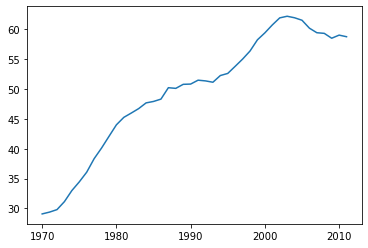

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')

plt.plot(women_degrees['Year'], women_degrees['Biology'])
plt.show()

From the plot, we can tell that Biology degrees increased steadily from 1970 and peaked in the early 2000's. We can also tell that the percentage has stayed above 50% since around 1987. While it's helpful to visualize the trend of Biology degrees awarded to women, it only tells half the story. If we want the gender gap to be apparent and emphasized in the plot, we need a visual analogy to the difference in the percentages between the genders.

If we visualize the trend of Biology degrees awarded to men on the same plot, a viewer can observe the space between the lines for each gender. We can calculate the percentages of Biology degrees awarded to men by subtracting each value in the Biology column from 100. Once we have the male percentages, we can generate two line charts as part of the same diagram.

Let's now create a diagram containing both the line charts we just described.

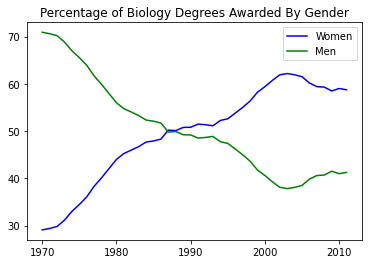

In [3]:
men = 100 - women_degrees['Biology']

plt.plot(women_degrees['Year'], women_degrees['Biology'], 'b',
         women_degrees['Year'],  men, 'g')


plt.title('Percentage of Biology Degrees Awarded By Gender')
plt.legend(['Women', 'Men'], loc = 'upper right' )
plt.show()

## Data-Ink Ratio

The chart containing both line charts tells a more complete story than the one containing just the line chart that visualized just the women percentages. This plot instead tells the story of two distinct periods. In the first period, from 1970 to around 1987, women were a minority when it came to majoring in Biology while in the second period, from around 1987 to around 2012, women became a majority. You can see the point where women overtook men where the lines intersect. While a viewer could have reached the same conclusions using the individual line chart of just the women percentages, it would have required more effort and mental processing on their part.

Although our plot is better, it still contains some extra visual elements that aren't necessary to understand the data. We're interested in helping people understand the gender gap in different fields across time. These excess elements, sometimes known as chartjunk, increase as we add more plots for visualizing the other degrees, making it harder for anyone trying to interpret our charts. In general, we want to maximize the data-ink ratio, which is the fractional amount of the plotting area dedicated to displaying the data.

The following is an animated GIF by Darkhorse Analytics that shows a series of tweaks for boosting the data-ink ratio:

https://s3.amazonaws.com/dq-content/147/data-ink.gif


Non-data ink includes any elements in the chart that don't directly display data points. This includes tick markers, tick labels, and legends. Data ink includes any elements that display and depend on the data points underlying the chart. In a line chart, data ink would primarily be the lines and in a scatter plot, the data ink would primarily be in the markers. As we increase the data-ink ratio, we decrease non-data ink that can help a viewer understand certain aspects of the plots. We need to be mindful of this trade-off as we work on tweaking the appearance of plots to tell a story, because plots we create could end up telling the wrong story.

This principle was originally set forth by Edward Tufte, a pioneer of the field of data visualization. Tufte's first book, The Visual Display of Quantitative Information, is considered a bible among information designers. We cover some of the ideas presented in the book in this course, but we recommend going through the entire book for more depth.

To improve the data-ink ratio, let's make the following changes to the plot we created in the last step:

Remove all of the axis tick marks.
Hide the spines, which are the lines that connects the tick marks, on each axis.

### Hiding Tick Marks

To customize the appearance of the ticks, we use the Axes.tick_params() method. Using this method, we can modify which tick marks and tick labels are displayed. By default, matplotlib displays the tick marks on all four sides of the plot. Here are the four sides for a standard line chart:

- The left side is the y-axis.
- The bottom side is the x-axis.
- The top side is across from the x-axis.
- The right side is across from the y-axis.

The parameters for enabling or disabling tick marks are conveniently named after the sides. To hide all of them, we need to pass in the following values for each parameter when we call Axes.tick_params():

- `bottom`: `False`
- `top`: `False`
- `left`: `False`
- `right`: `False`

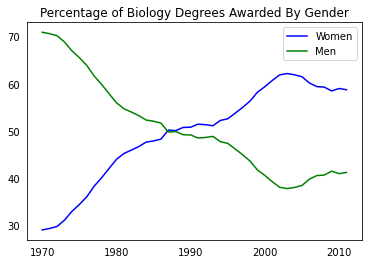

In [6]:
fig, ax = plt.subplots()

ax.plot(women_degrees['Year'], women_degrees['Biology'], 'b',
         women_degrees['Year'],   100 - women_degrees['Biology'], 'g')


ax.set_title('Percentage of Biology Degrees Awarded By Gender')
ax.tick_params(bottom = False, top = False, left = False, right = False)
ax.legend(['Women', 'Men'], loc = 'upper right' )
plt.show()

### Hiding spines

With the axis tick marks gone, the data-ink ratio is improved and the chart looks much cleaner. In addition, the spines in the chart now are no longer necessary. When we're exploring data, the spines and the ticks complement each other to help us refer back to specific data points or ranges. When a viewer is viewing our chart and trying to understand the insight we're presenting, the ticks and spines can get in the way. As we mentioned earlier, chartjunk becomes much more noticeable when you have multiple plots in the same chart. By keeping the axis tick labels but not the spines or tick marks, we strike an appropriate balance between hiding chartjunk and making the data visible.

In matplotlib, the spines are represented using the matplotlib.spines.Spine class. When we create an Axes instance, four Spine objects are created for us. If you run print(ax.spines), you'll get back a dictionary of the Spine objects:

In [7]:
print(ax.spines)

OrderedDict([('left', <matplotlib.spines.Spine object at 0x00000164113C7B50>), ('right', <matplotlib.spines.Spine object at 0x00000164113C7B80>), ('bottom', <matplotlib.spines.Spine object at 0x00000164113C7CA0>), ('top', <matplotlib.spines.Spine object at 0x000001641128E970>)])


To hide all of the spines, we need to:

- access each Spine object in the dictionary
- call the Spine.set_visible() method
- pass in the Boolean value False

The following line of code removes the spines for the right axis:

In [8]:
ax.spines["right"].set_visible(False)

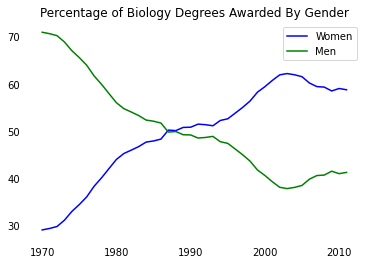

In [10]:
fig, ax = plt.subplots()
ax.plot(women_degrees['Year'], women_degrees['Biology'], c='blue', label='Women')
ax.plot(women_degrees['Year'], 100-women_degrees['Biology'], c='green', label='Men')
ax.tick_params(bottom=False, top=False, left=False, right=False)
# Add your code here
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(loc='upper right')
ax.set_title('Percentage of Biology Degrees Awarded By Gender')
plt.show()

### Comparing gender gap across degree categories...

So far, matplotlib has set the limits automatically for each axis and this hasn't had any negative effect on communicating our story with data. If we want to generate charts to compare multiple degree categories, the axis ranges need to be consistent. Inconsistent data ranges can distort the story our charts are telling and fool the viewer.

Edward Tufte often preaches that a good chart encourages comparison over just description. A good chart uses a consistent style for the elements that aren't directly conveying the data points. These elements are part of the non-data ink in the chart. By keeping the non-data ink as consistent as possible across multiple plots, differences in those elements stick out easily to the viewer. This is because our visual processing systems are excellent at discerning differences quickly and brings them to the front of our thought process. The similarities naturally fade to the back of our thought process.

Let's generate line charts for four STEM degree categories on a grid to encourage comparison. Our instructions for generating the chart are cumbersome. 

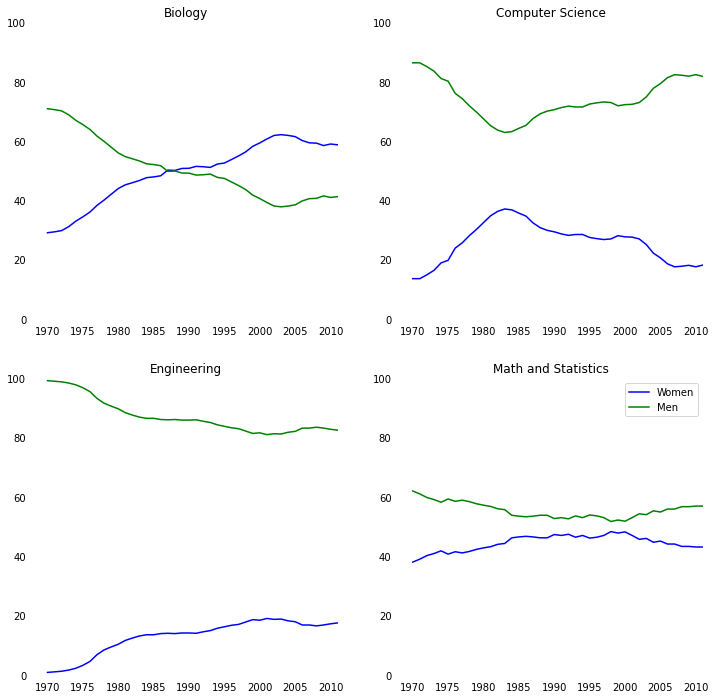

In [12]:
major_cats = ['Biology', 'Computer Science', 'Engineering', 'Math and Statistics']
fig = plt.figure(figsize=(12, 12))

for sp in range(0,4):
    ax = fig.add_subplot(2,2,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[major_cats[sp]], c='blue', label='Women')
    ax.plot(women_degrees['Year'], 100-women_degrees[major_cats[sp]], c='green', label='Men')
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0, 100)
    ax.tick_params(bottom = False, top = False, left = False, right = False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_title(major_cats[sp])


# Calling pyplot.legend() here will add the legend to the last subplot that was created.
plt.legend(loc='upper right')
plt.show()

 This chart can still be improved, however, and we'll explore more techniques in the next mission.